# Init ECG

In [48]:
import numpy as np
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as stats
import os

In [62]:
data_path_500 = '../data/physionet.org/files/ptb-xl/1.0.3/records500/00000/00001_hr'

# es werden gleichzeitig EKG Daten und Metadaten gelesen
X, meta = wfdb.rdsamp(data_path_500)

fs = meta['fs']
cols = meta['sig_name']
t = pd.to_timedelta(np.arange(X.shape[0]) / fs, unit="s")

df1 = pd.DataFrame(X, columns=cols, index=t)
df1.index.name = "time"

In [50]:
data_path_100 = '../data/physionet.org/files/ptb-xl/1.0.3/records100/21000/21656_lr'

# es werden gleichzeitig EKG Daten und Metadaten gelesen
X, meta = wfdb.rdsamp(data_path_100)

fs = meta['fs']
cols = meta['sig_name']
t = pd.to_timedelta(np.arange(X.shape[0]) / fs, unit="s")

df2 = pd.DataFrame(X, columns=cols, index=t)
df2.index.name = "time"

# Datenanalyse ECK Daten
- Struktur anschauen

In [51]:
df1.head()

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
time,,,,,,,,,,,,
0 days 00:00:00,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.002000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.004000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.006000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.008000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075


Die EKG-Ableitungen sind die Features in den EKG-Daten.
- Ableitung nach Einthoven (I, II, III)     https://flexikon.doccheck.com/de/Ableitung_nach_Einthoven
- Ableitung nach Goldberger (aVR, aVL, aVF) https://flexikon.doccheck.com/de/Ableitung_nach_Goldberger
- Ableitung nach Wilson (V1-V6)             https://flexikon.doccheck.com/de/Ableitung_nach_Wilson

https://flexikon.doccheck.com/de/Elektrokardiogramm

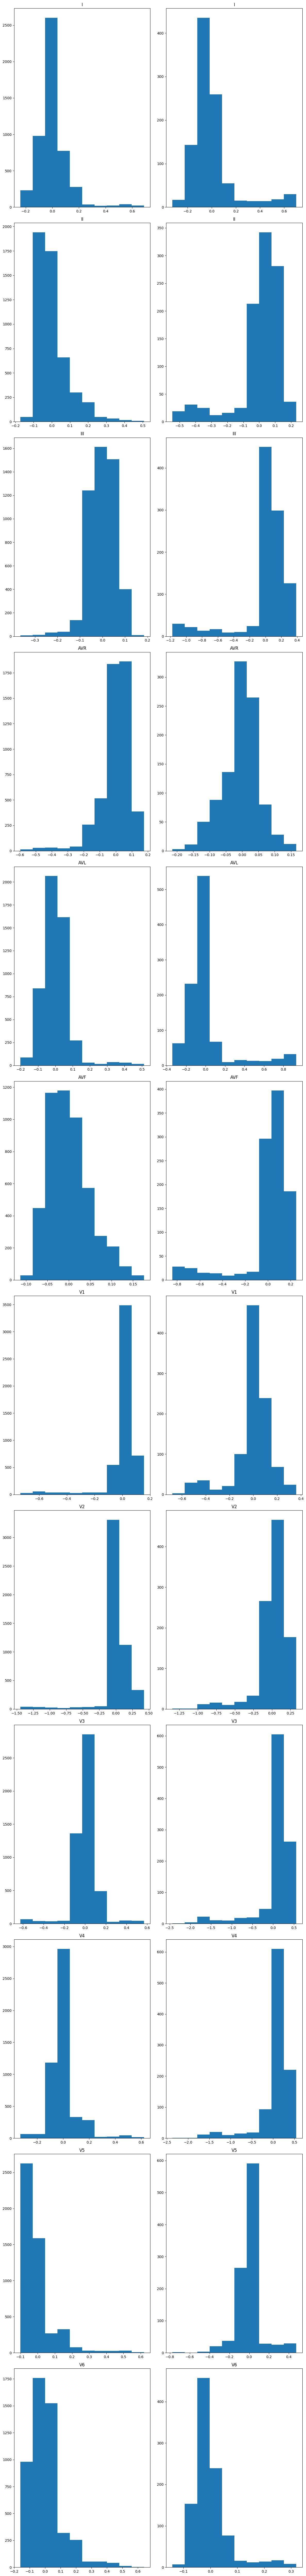

In [52]:
"""

Vergleich der Verteilungen zwischen 2 Personen


"""
fig, ax = plt.subplots(len(df1.columns), 2, figsize=(12, 100))

for i, col in enumerate(df1.columns):
    ax[i,0].hist(df1[col])
    ax[i,0].set_title(col)

for i, col in enumerate(df2.columns):
    ax[i,1].hist(df2[col])
    ax[i,1].set_title(col)

plt.tight_layout()
plt.show()

# Band Pass Filter

In [53]:
df1.head()

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
time,,,,,,,,,,,,
0 days 00:00:00,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.002000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.004000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.006000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.008000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075


In [54]:
from scipy import signal
import matplotlib.pyplot as plt

In [55]:
f_low = 0.5
f_high = 40
order = 4

sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
sig = signal.sosfiltfilt(sos, df1['I'].to_numpy())

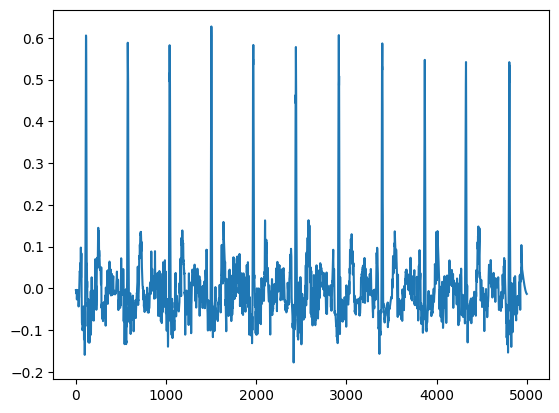

In [56]:
plt.plot(sig)
plt.show()

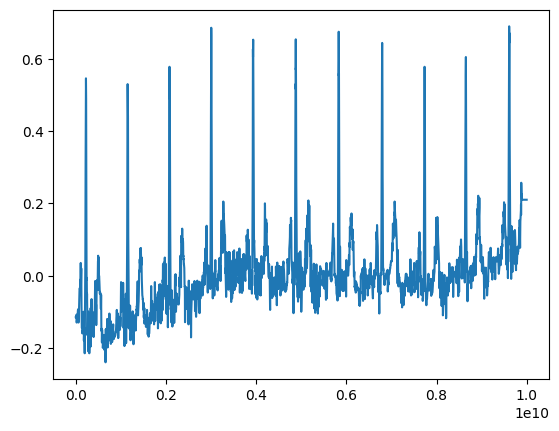

In [57]:
plt.plot(df1['I'])
plt.show()

ValueError: The length of the input vector x must be greater than padlen, which is 27.

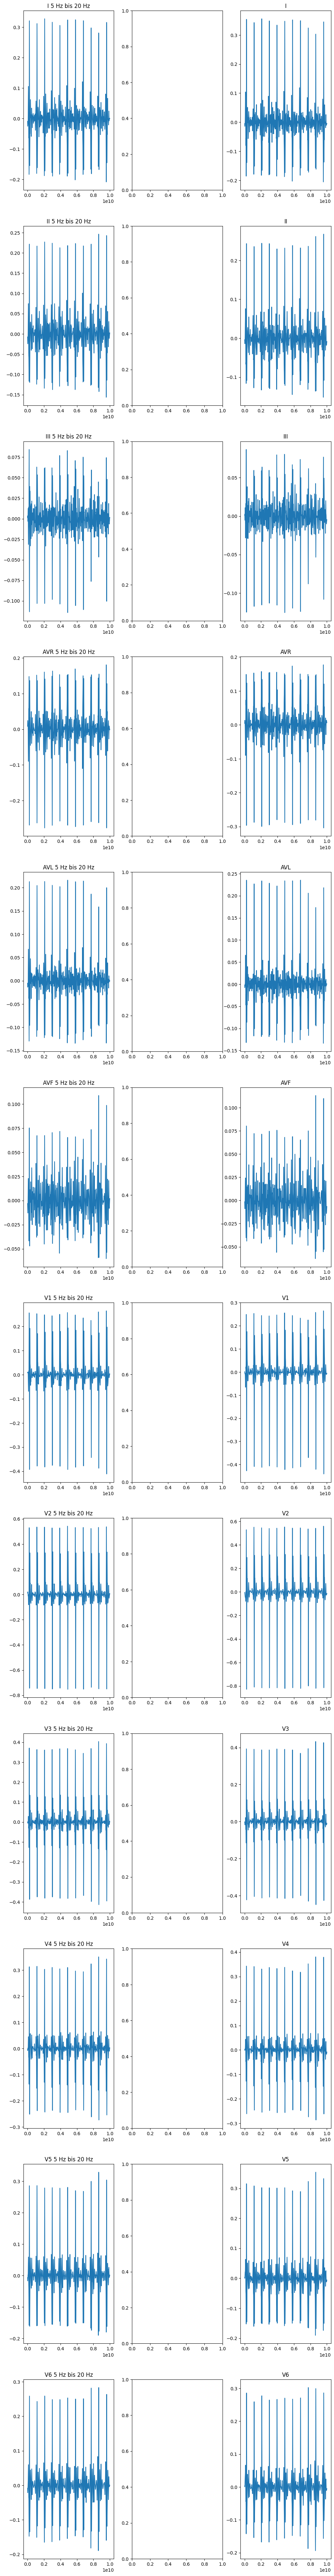

In [61]:
from sklearn.preprocessing import StandardScaler
df11 = df1
fig, ax = plt.subplots(len(df1.columns), 3, figsize=(12, 100))
scaler = StandardScaler()
f_low = 5
f_high = 20

# Plot vor dem filtern
for i, col in enumerate(df1.columns):
    ax[i,2].plot(df1[col])
    ax[i,2].set_title(col)

# Filter
for i, col in enumerate(df1.columns):
    sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
    sig = signal.sosfiltfilt(sos, df1[col].to_numpy())
    df1[col] = sig

# Data scaling nach dem filtern
#df1_transformed = scaler.fit_transform(df1)

# Plot skalierte und gefilterte Daten
for i, col in enumerate(df1.columns):
    ax[i,0].plot(df1[col])
    ax[i,0].set_title(f'{col} 5 Hz bis 20 Hz')

##########
f_low = 0.5
f_high = 50

for i, col in enumerate(df1.columns):
    sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
    sig = signal.sosfiltfilt(sos, df11[col].iloc[0:20].to_numpy())
    df11[col] = sig

# Data scaling nach dem filtern
#df1_transformed = scaler.fit_transform(df1)

# Plot skalierte und gefilterte Daten
for i, col in enumerate(df1.columns):
    ax[i,1].plot(df11[col])
    ax[i,1].set_title(f'{col} 0.5 Hz bis 40 Hz')

########

plt.tight_layout()
plt.show()

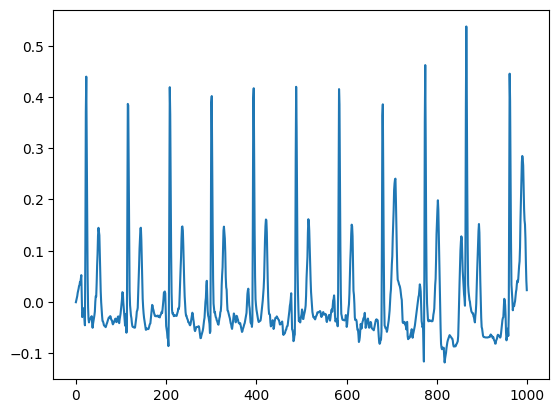

In [20]:
scaler = StandardScaler()
scaler.fit_transform(np.array([sig]))
plt.plot(sig)
plt.show()

In [65]:

sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
sig = signal.sosfiltfilt(sos, df11[col].to_numpy())


In [71]:
len(sig)

5000

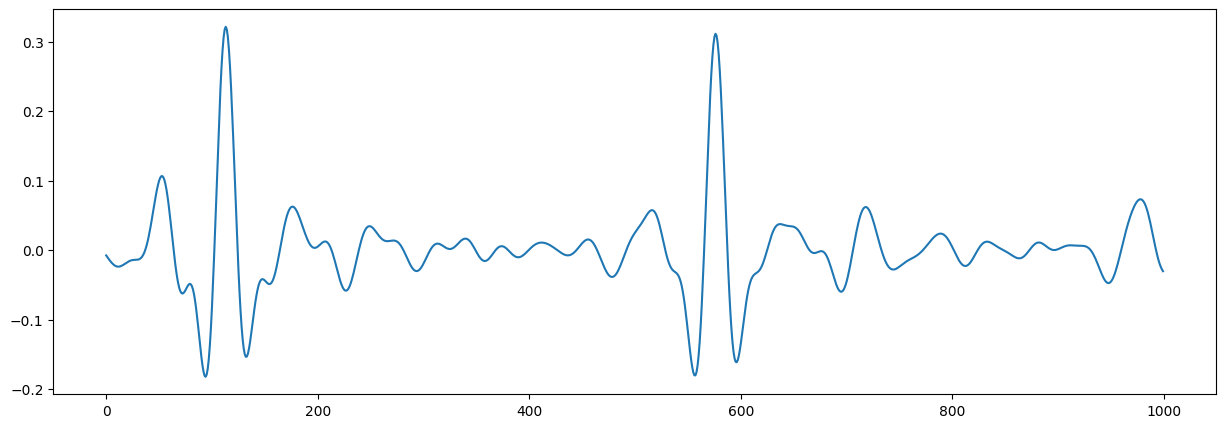

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(sig[0:1000])
plt.show()

[80, 165, 245, 331, 418, 500]
[65, 105, 120, 125, 145, 500]


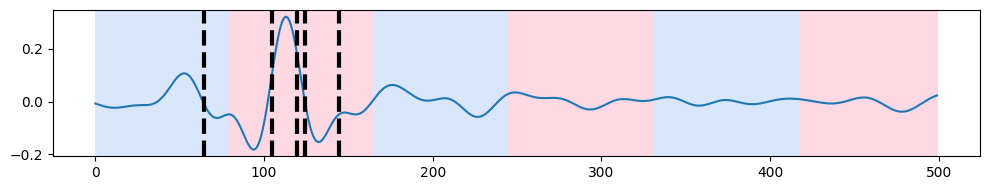

In [101]:
# Source - https://stackoverflow.com/a
# Posted by Mario
# Retrieved 2025-11-13, License - CC BY-SA 4.0

#install library
#!python -m pip install ruptures

#import libraries
import matplotlib.pyplot as plt
import ruptures as rpt

#genearte sample data in form of a signal
n_samples, n_dims, sigma = 500, 1, 1
n_bkps = 5  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)
print(bkps) #[340, 671, 1000]

# detection
algo = rpt.Dynp(model="l2").fit(sig[0:500])
result = algo.predict(n_bkps=5)

print(result)
#[340, 670, 1000]

# display segmentation
rpt.display(sig[0:500], bkps, result)
plt.show()


In [102]:
sig

array([-0.00760159, -0.0098148 , -0.01199046, ..., -0.00149847,
       -0.00139356, -0.00130255], shape=(5000,))

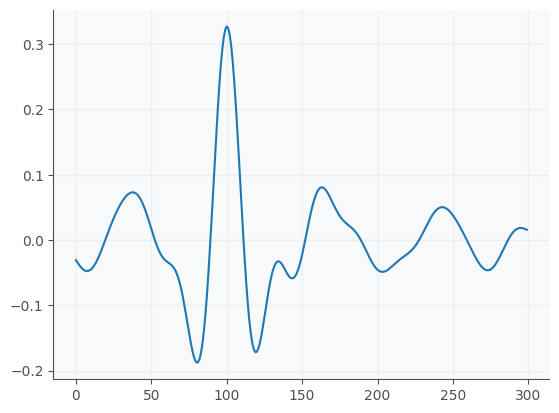

In [201]:
from biosppy.signals.ecg import ASI_segmenter, extract_heartbeats, ecg
plt.plot(ecg(signal=sig,sampling_rate=500,show=False)[4][2])
plt.show()


In [196]:
signals = ecg_Data[4][0:4]
signals.shape

(4, 300)

In [124]:
y = sig[r_peaks]
print(y.shape)
print(r_peaks.shape)

(1, 9)
(1, 9)


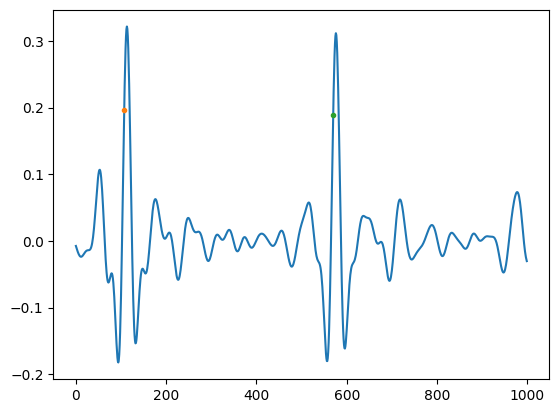

In [130]:
plt.plot(sig[0:1000])
plt.plot(r_peaks[:,0:2], y[:,0:2], '.')
plt.show()

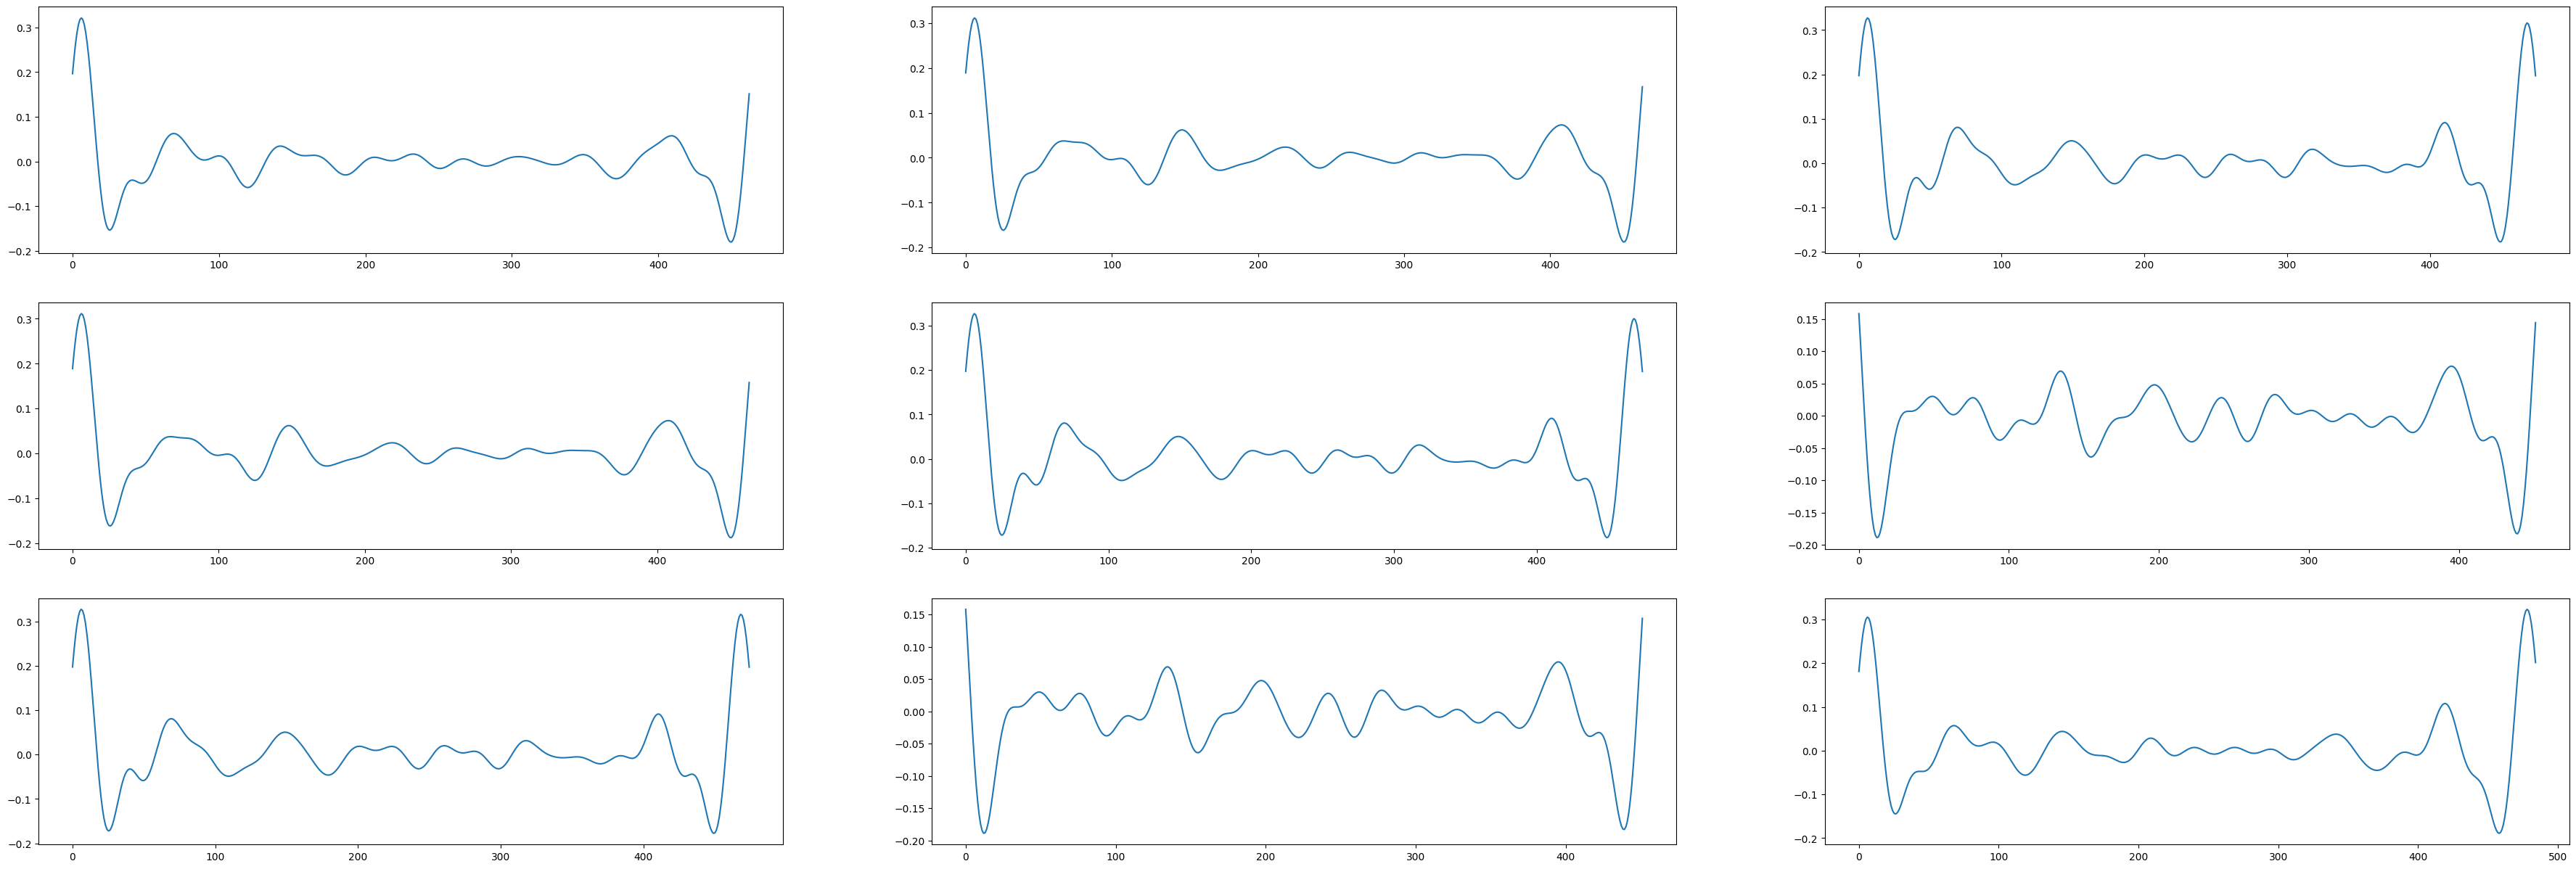

In [145]:
sig_parts = {}
for i in range(len(r_peaks)-1):
    sig_parts[f'Part {i}'] = sig[r_peaks[i].item() : r_peaks[i+1].item()]

fig, ax = plt.subplots(3, 3, figsize=(45, 15))
for i in range(3):
    for k in range(3):
        ax[i,k].plot(sig_parts[f'Part {i+k}'])

plt.show()

In [146]:
fs = 500  # Hz, Beispiel
t_pre  = 0.2   # 200 ms vor R
t_post = 0.4   # 400 ms nach R

pre  = int(t_pre * fs)
post = int(t_post * fs)

beats = []

for r in r_peaks:
    r = int(r)
    start = r - pre
    end   = r + post

    if start < 0 or end > len(sig):
        continue

    beat = sig[start:end]
    beats.append(beat)

beats = np.stack(beats)
print(beats.shape)

(9, 300)


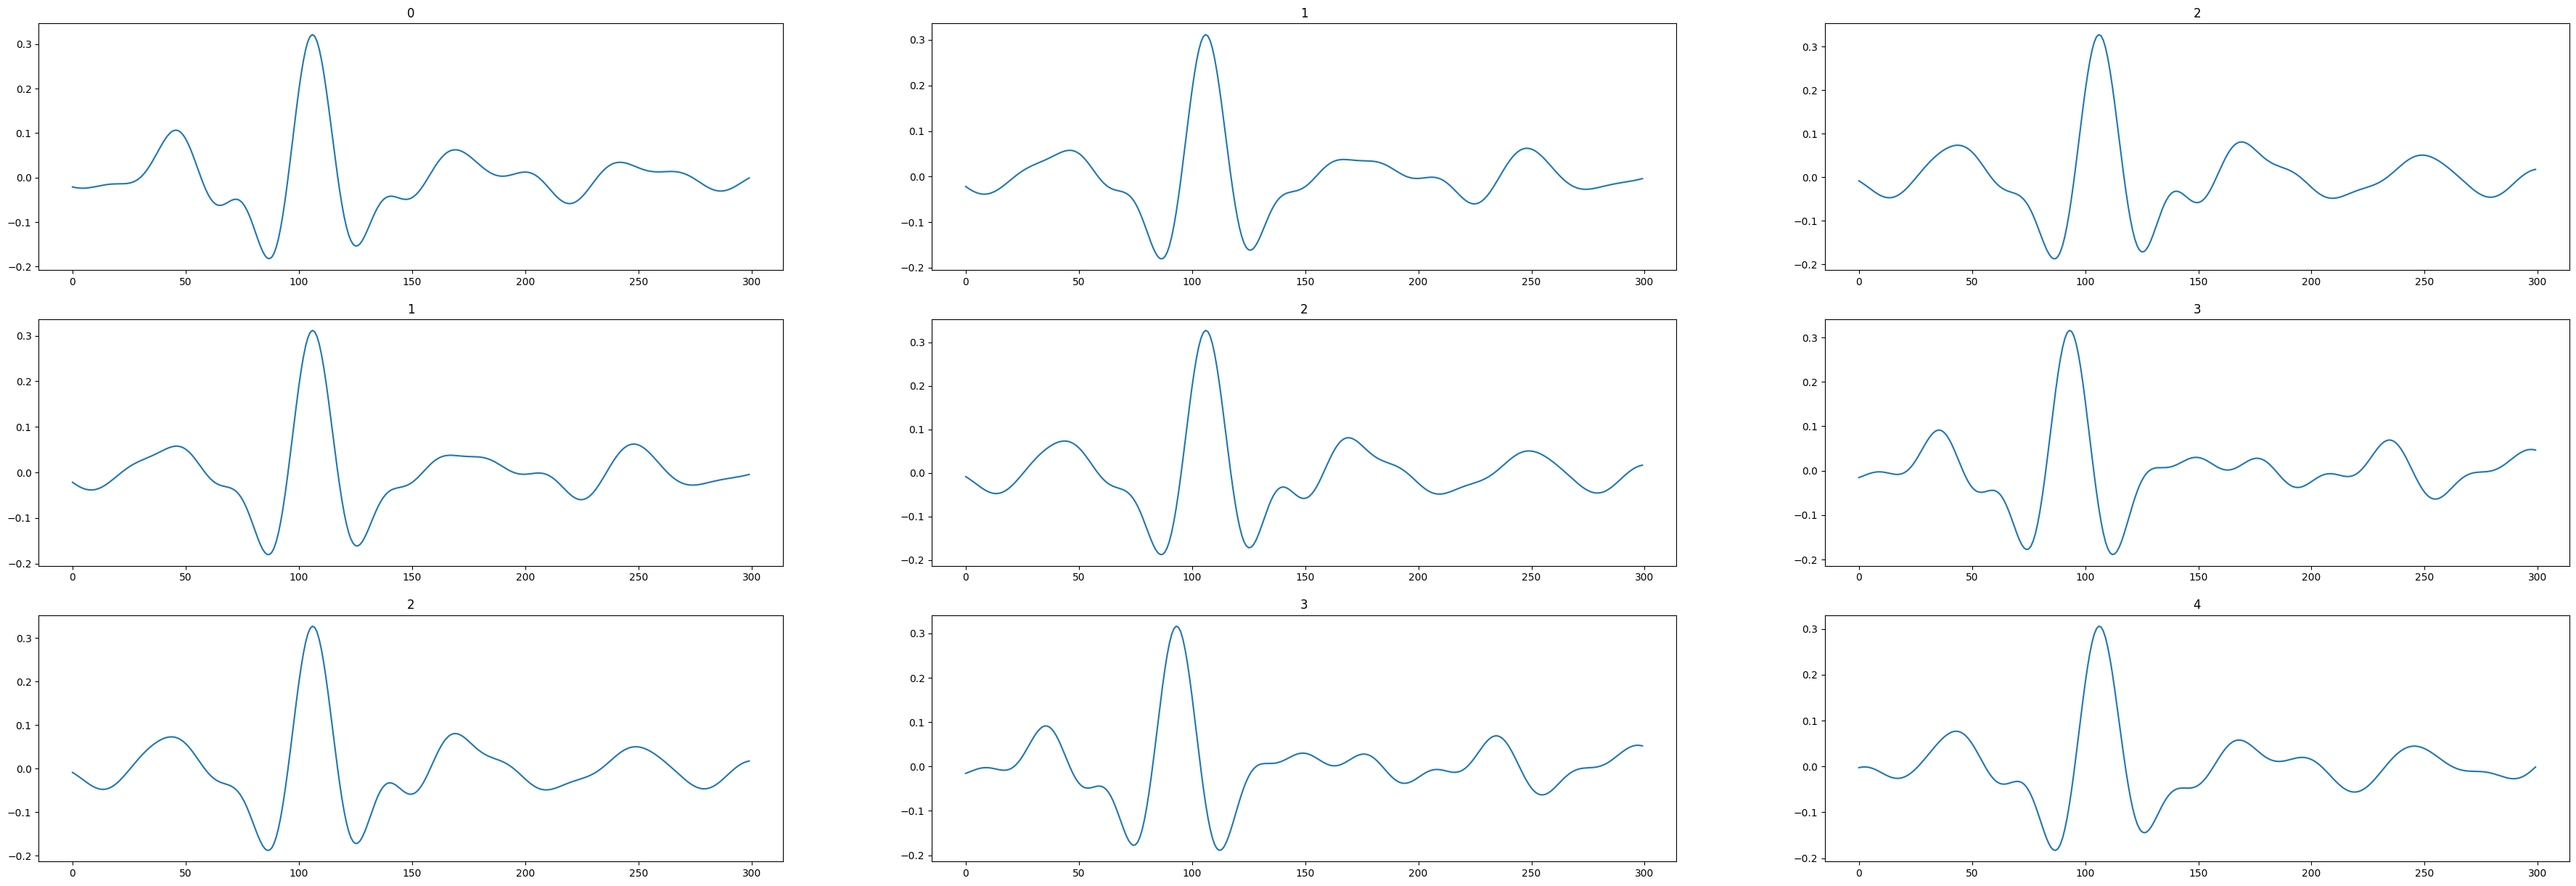

In [150]:
fig, ax = plt.subplots(3, 3, figsize=(45, 15))
for i in range(3):
    for k in range(3):
        ax[i,k].plot(beats[i+k])
        ax[i,k].set_title(f'{i + k}')

plt.show()

In [152]:
for i in range(9):
    print(beats[i])

[-2.09386422e-02 -2.20814816e-02 -2.29425890e-02 -2.35099925e-02
 -2.37822625e-02 -2.37687180e-02 -2.34890484e-02 -2.29724612e-02
 -2.22564444e-02 -2.13851914e-02 -2.04077085e-02 -1.93756150e-02
 -1.83406605e-02 -1.73520093e-02 -1.64533782e-02 -1.56801469e-02
 -1.50565812e-02 -1.45933257e-02 -1.42853216e-02 -1.41103014e-02
 -1.40279937e-02 -1.39801534e-02 -1.38915029e-02 -1.36716387e-02
 -1.32179174e-02 -1.24192931e-02 -1.11610283e-02 -9.33014993e-03
 -6.82146937e-03 -3.54393927e-03  5.72926709e-04  5.57287657e-03
  1.14673137e-02  1.82305971e-02  2.57965744e-02  3.40566462e-02
  4.28596141e-02  5.20134998e-02  6.12894424e-02  7.04276855e-02
  7.91455598e-02  8.71472576e-02  9.41350829e-02  9.98217574e-02
  1.03943272e-01  1.06271695e-01  1.06627313e-01  1.04889438e-01
  1.01005263e-01  9.49961624e-02  8.69609538e-02  7.70757258e-02
  6.55900142e-02  5.28192642e-02  3.91337143e-02  2.49440318e-02
  1.06842240e-02 -3.20747379e-03 -1.63088788e-02 -2.82343376e-02
 -3.86543570e-02 -4.73133

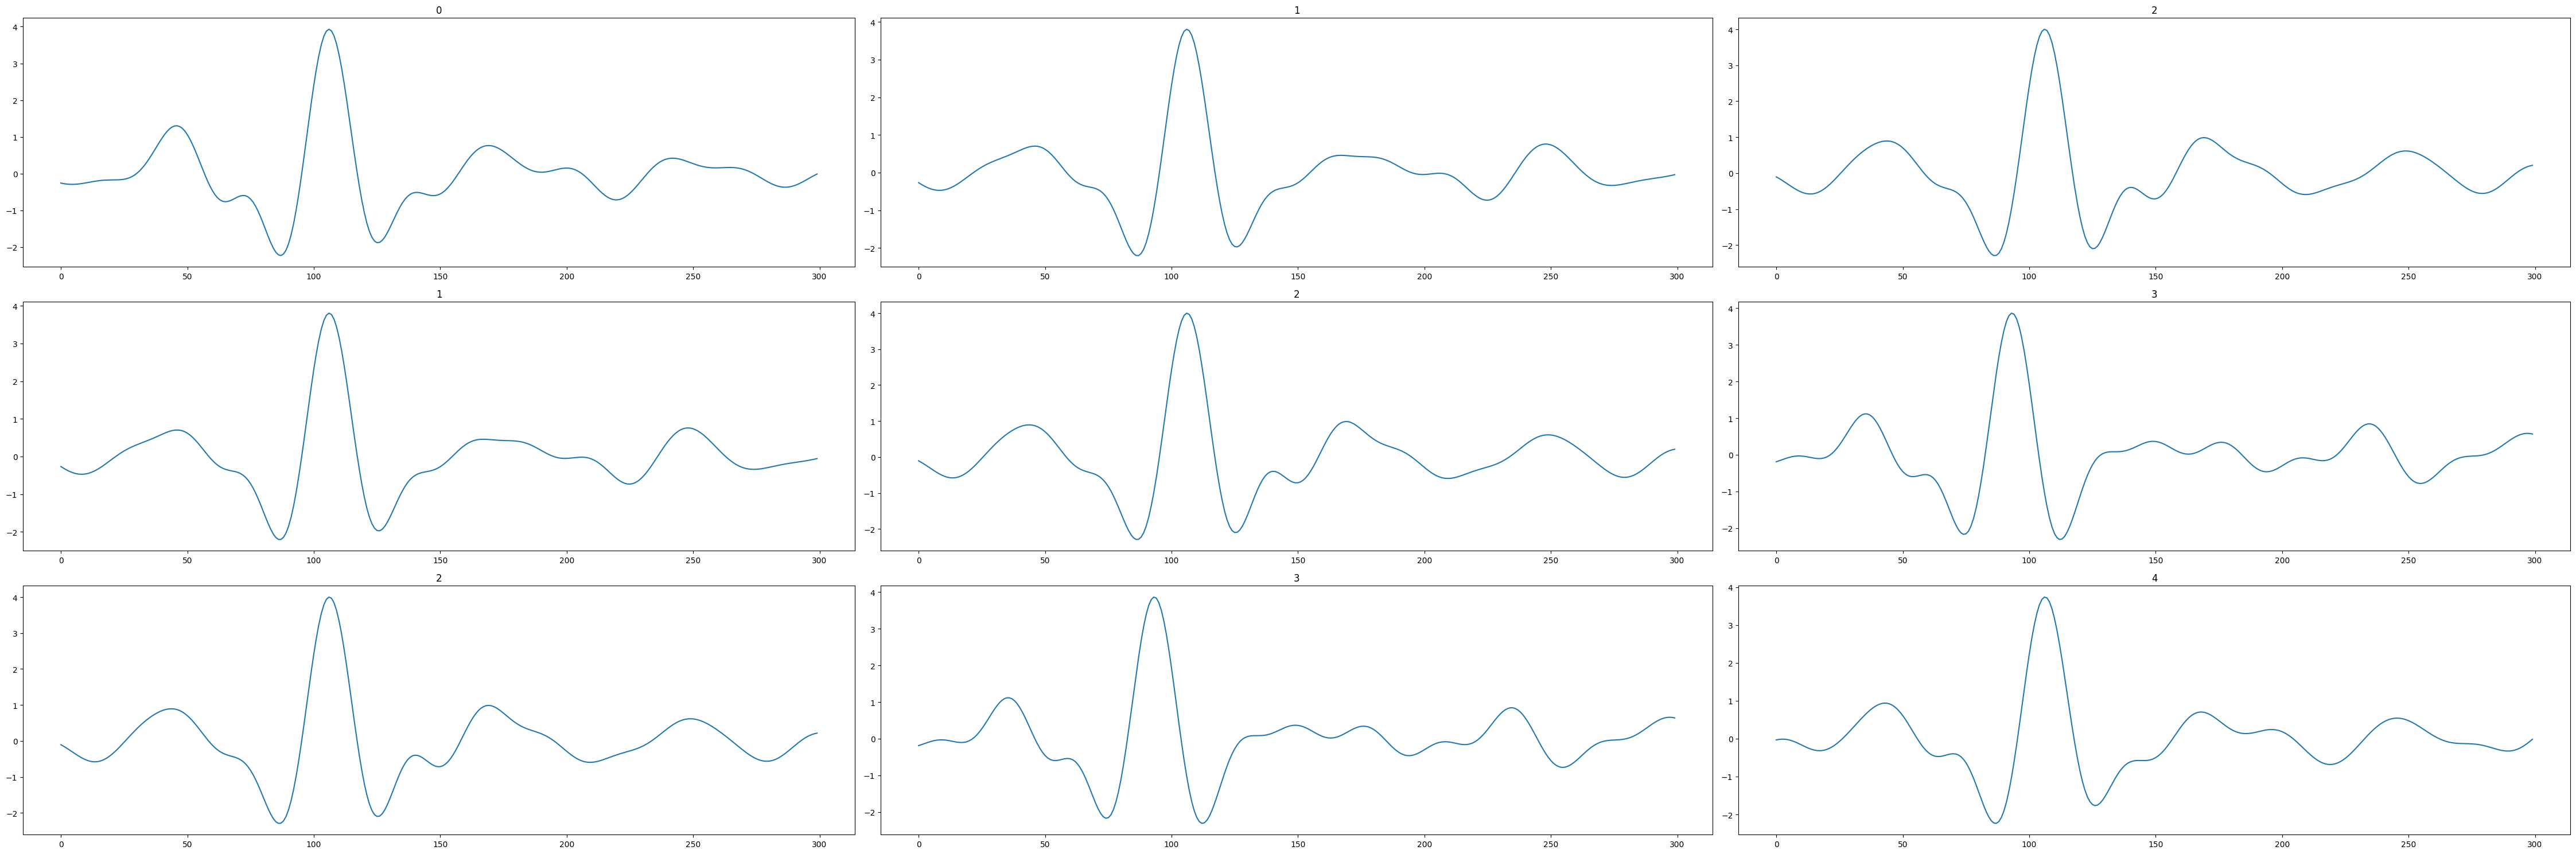

In [155]:
scaler = StandardScaler()
beats_flat = beats.reshape(-1,1)
scaler.fit(beats_flat)

beats_flat_scaled = scaler.fit_transform(beats_flat)

beats_scaled = beats_flat_scaled.reshape(9, 300)

fig, ax = plt.subplots(3, 3, figsize=(45, 15))
for i in range(3):
    for k in range(3):
        ax[i,k].plot(beats_scaled[i+k])
        ax[i,k].set_title(f'{i + k}')
plt.tight_layout()
plt.show()

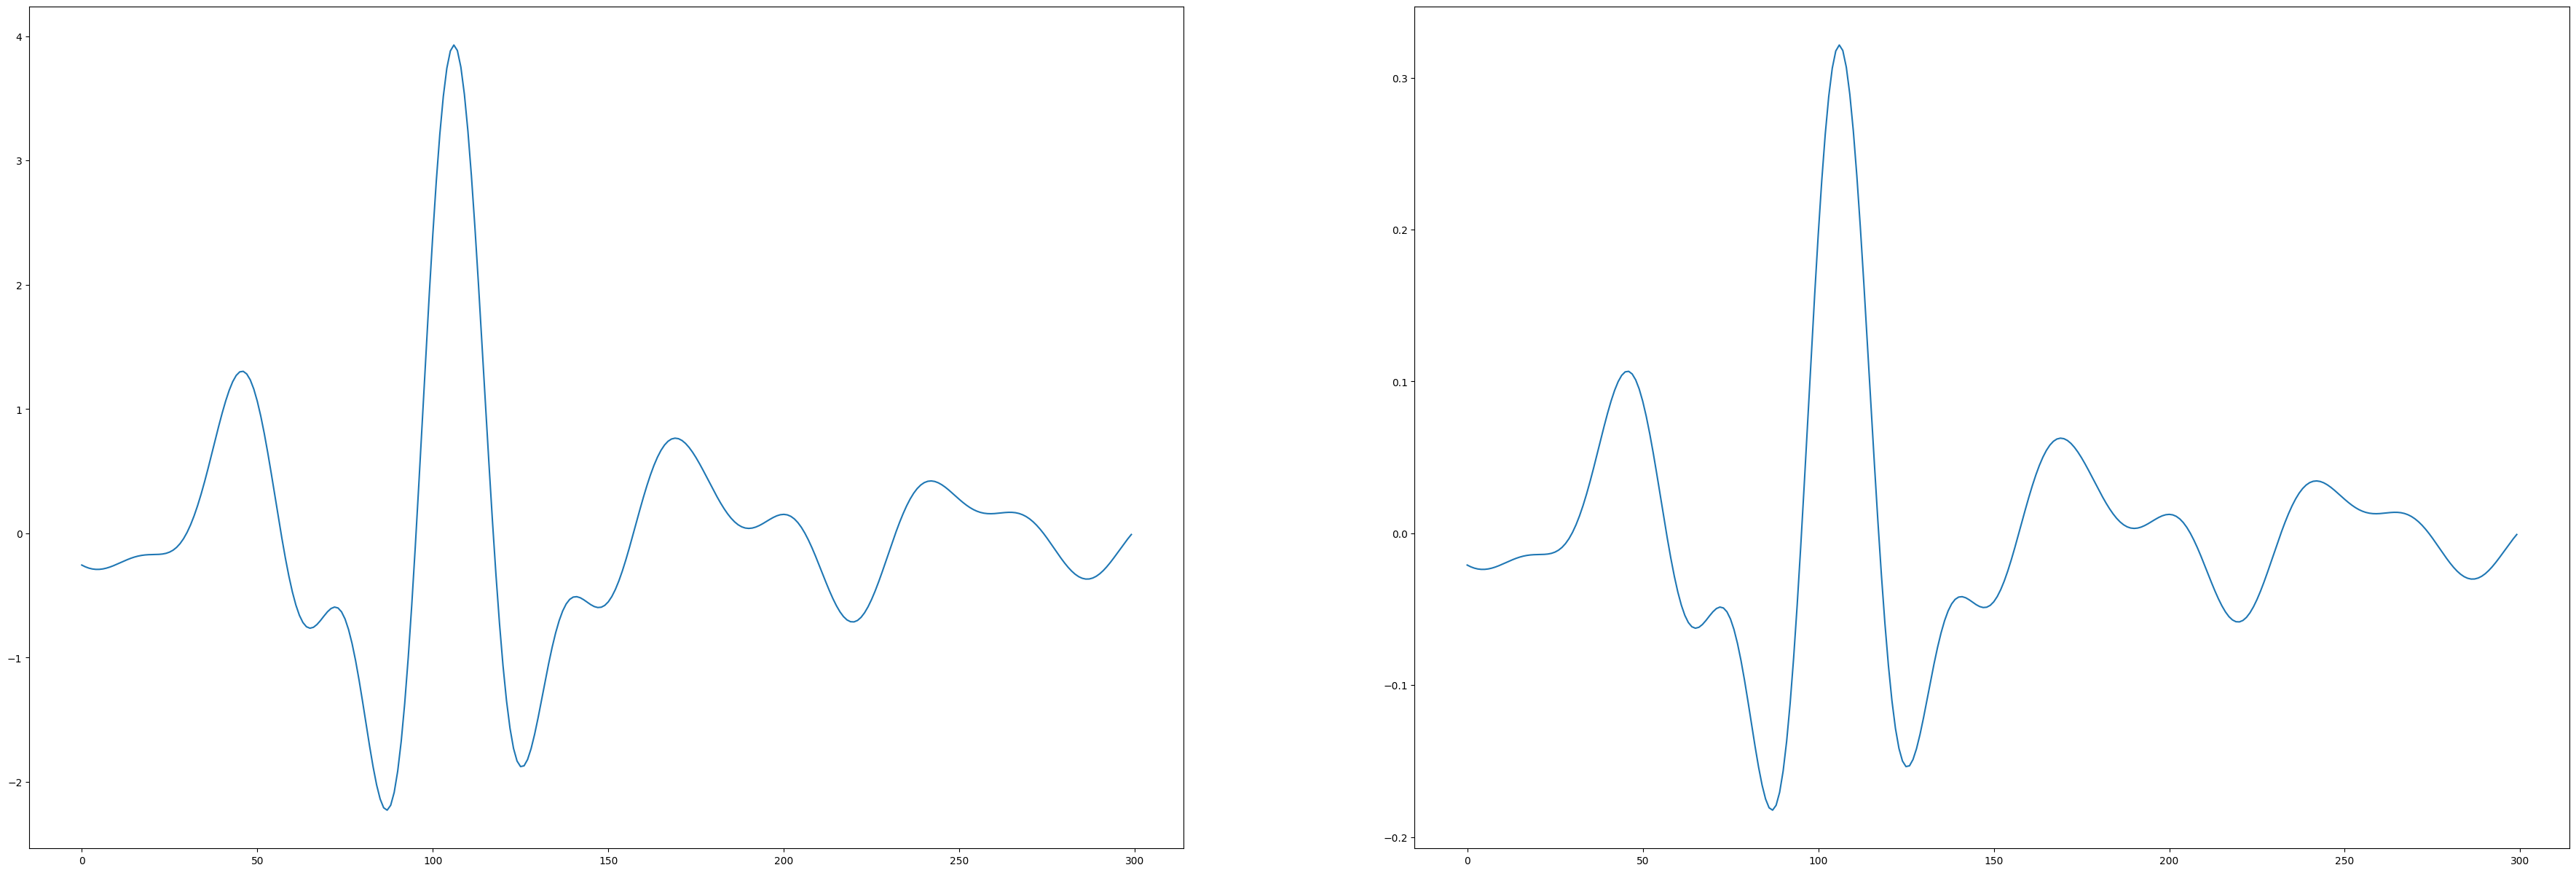

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(45, 15))
ax[0].plot(beats_scaled[0])
ax[1].plot(beats[0])
plt.show()

In [160]:
beats.shape

(9, 300)

In [162]:
signal.shape

(500, 1)

In [163]:
def ecg_segmentation(signal, t_pre, t_post, sampling_rate=500):
    """
    Es wird ein Segment im Intervall [r_peak{i} - t_pre, r_peak{i} + t_post]
    """

    r_peaks = np.array(ASI_segmenter(signal))
    r_peaks = r_peaks.reshape(len(r_peaks[0]))

    pre = int(t_pre * sampling_rate)
    post = int(t_post * sampling_rate)

    beats = []

    for r in r_peaks:
        r = int(r)
        start = r - pre
        end = r + post

        # Sicherheitscheck für die Randbedingungen, wenn es vor dem 0 oder nach dem ende ist, soll es mit dem Signal aufhören und mit nächsten anfangen
        if start < 0 or end > len(signal):
            continue

        beat = signal[start:end]
        beats.append(beat)

    beats = np.stack(beats)
    return beats


In [164]:
ecg_segmentation(signal, 200, 400)

ValueError: need at least one array to stack